In [1]:
# import gym
# from gym import spaces
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import PPO, DQN, A2C, DDPG, SAC
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
import numpy as np
import random
from shapely.geometry import Polygon,Point, LineString
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from utils import polygon_to_Poly3DCollection
import rasterio.features
from shapely import affinity
from sb3_contrib import RecurrentPPO
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
np.set_printoptions(threshold=np.inf)


print(gym.__version__)

0.29.1


# Util functions for input data


In [2]:
sting = '103.9184733 1.3092462, 103.9185355 1.3092515, 103.9185338 1.3092714, 103.9186415 1.3092804, 103.9186431 1.3092613, 103.9187158 1.3092674, 103.91872 1.3092156, 103.9187321 1.3092166, 103.9187379 1.3091466, 103.9186642 1.3091404, 103.9186697 1.3090749, 103.9187467 1.3090814, 103.9187526 1.3090106, 103.9187395 1.3090095, 103.9187444 1.3089509, 103.9186749 1.3089451, 103.9186763 1.3089285, 103.9185696 1.3089195, 103.9185683 1.3089349, 103.9185011 1.3089292, 103.9184967 1.3089811, 103.9184756 1.3089793, 103.9184691 1.3090564, 103.918545 1.3090628, 103.9185392 1.3091312, 103.9184654 1.3091249, 103.9184593 1.3091968, 103.9184773 1.3091984, 103.9184733 1.3092462'
#replace "' "with ","
sting = sting.replace(", ",",")

string_list = sting.split(",")
# print(string_list)
string_list = ["("+ string_list[i].replace(" ",",") + ")" for i in range(len(string_list))]

string = "("+ ",".join(string_list) + ")"
# print(string)

/Users/jefflai/SpaDS/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jefflai/SpaDS/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jefflai/SpaDS/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jefflai/SpaDS/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: Matplotli

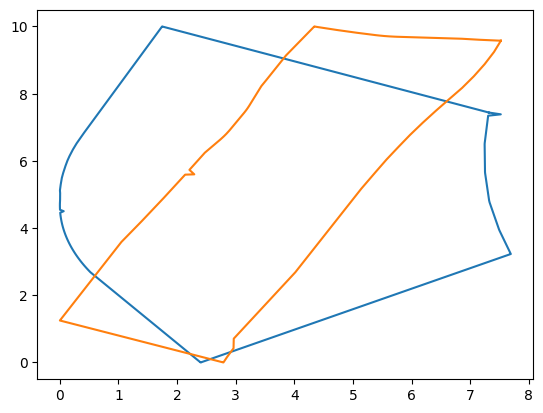

In [3]:
sites_list = [
                Polygon(((103.76762137358979,1.3087990670131122),(103.76695888021099,1.3091033941901744),(103.76695888021099,1.3091033941901782),(103.76680089609894,1.3087280864870512),(103.766792747434,1.3087078172631332),(103.76678557945053,1.3086899861164933),(103.76677812454516,1.3086684317627417),(103.76677122299097,1.3086453681151176),(103.7667670091718,1.308629112978794),(103.76676302875474,1.308610442969295),(103.76675844145478,1.308585861093),(103.76675564607066,1.308568042468877),(103.7667533421893,1.3085446293791023),(103.76675190226392,1.30852567236893),(103.76675180617868,1.3085231659641638),(103.76675217242752,1.3085144072545394),(103.76675207742,1.3084925885686336),(103.76675194337425,1.3084860243757694),(103.76675179918865,1.3084809478597594),(103.7667517106069,1.3084758790108302),(103.7667516777277,1.30847081910914),(103.76675170047343,1.3084657425356094),(103.76675178278158,1.3084603788857558),(103.76675190539342,1.3084553122515075),(103.766759415393,1.3084502477405577),(103.76675234045226,1.3084448982895578),(103.76675262913469,1.3084398468137872),(103.76675297264875,1.30843479804762),(103.76675337164095,1.308429760924249),(103.7667538265147,1.3084247131985483),(103.76675436383049,1.3084194076934133),(103.766754929798,1.3084143621108462),(103.76675554278873,1.3084093157891215),(103.76675623518352,1.3084040881540013),(103.76675695186114,1.3083991144012195),(103.76675772636361,1.3083941199926599),(103.7667585981971,1.3083888850082213),(103.76675947173706,1.3083839153246697),(103.76676040667252,1.3083789760982625),(103.76676143482773,1.3083738029708472),(103.76676252125338,1.3083686400989731),(103.76676359985571,1.3083637364392524),(103.76676473694107,1.3083588713631675),(103.76676598859025,1.3083537327630061),(103.76676721542269,1.3083489250335345),(103.7667685661309,1.30834388081516),(103.76676998123311,1.3083387781575588),(103.7667713777606,1.3083339540246992),(103.76677288501628,1.3083289535549412),(103.76677431495274,1.3083243728196843),(103.76677594002432,1.308319412844347),(103.7667776044232,1.3083144450305626),(103.76677923565617,1.3083097919766917),(103.76678109463339,1.3083046375442602),(103.76678287287089,1.30829985562966),(103.76678465129328,1.3082952392626963),(103.76678653966118,1.3082904938452273),(103.7667884690412,1.3082857914938295),(103.76679050494603,1.3082809810350113),(103.766792652022,1.3082760417058086),(103.76679468914062,1.3082714786919092),(103.76679669853525,1.308267125485),(103.76679893802313,1.308262412675837),(103.76680124155497,1.3082576830310426),(103.76680345530123,1.3082532600238392),(103.76680579233569,1.3082487256194255),(103.76680831269016,1.3082439502444518),(103.76681077662153,1.308239388683786),(103.76681316405632,1.3082350862344916),(103.76681367260619,1.3082341941146542),(103.7670369584743,1.307915310591265),(103.7670369584743,1.3079153105912689),(103.76766580058731,1.308298877127881),(103.76766580058731,1.3082988771278814),(103.7676428514021,1.30838189675668),(103.76764179810895,1.3083863255490304),(103.76762282479181,1.3084812464296733),(103.7676218261851,1.3084883025243677),(103.76761371619476,1.30858474385251),(103.76761349686825,1.3085895323950083),(103.76761275665643,1.3086863455250057),(103.76761291779121,1.3086913506228472),(103.7676198824296,1.308787898815235),(103.767645505,1.3087927382936007),(103.76762137358979,1.3087990670131138))),
              Polygon(((103.76881799558069,1.3113251436959874),(103.76881140669404,1.3113255727539448),(103.76873396113677,1.3113315665393301),(103.76872784263504,1.3113321102857496),(103.76865738056709,1.3113391824336829),(103.76839126471891,1.3113533462825622),(103.76838106854085,1.3113540831328867),(103.76835900052754,1.3113560993222997),(103.76833891785218,1.3113586981033494),(103.76831699267106,1.3113623775367729),(103.76830393468646,1.3113649016606184),(103.76822916610874,1.311381278147748),(103.76822326065329,1.3113826413806544),(103.76814908496362,1.3114006451884348),(103.76814328579329,1.3114021211198539),(103.76806951434554,1.3114217711079816),(103.76806369241301,1.3114233919786933),(103.76805063357534,1.3114271859332673),(103.76805063357534,1.3114271859332676),(103.76793435831124,1.3112195678874503),(103.76785570785277,1.3110483549485854),(103.767854909063,1.3110466321041037),(103.76783283523227,1.3109994591068697),(103.76778345246646,1.3108599918491781),(103.7677810570058,1.310853493215834),(103.767775684187,1.3108394750826222),(103.76777019997111,1.310826231496659),(103.76776409052887,1.3108125214049136),(103.76776114891919,1.3108061449635922),(103.7677035103156,1.3106853657516602),(103.7676989924413,1.3106763377694812),(103.76768916217716,1.3106575804661729),(103.7676792703816,1.3106402915368032),(103.76766809354281,1.3106223308305385),(103.76766267840111,1.3106139769623915),(103.76760055230274,1.3105219074519354),(103.767594802784,1.3105107430616825),(103.767537054323,1.3103985563959337),(103.767557039474,1.310366533902596),(103.76751937486969,1.3103642385678935),(103.76744440558485,1.3102219736491236),(103.76743225026283,1.310198905858367),(103.76743066661837,1.3101959453563914),(103.76734150792808,1.3100317376402688),(103.7673397693827,1.3100285860524563),(103.76725723774882,1.3098813090027575),(103.767004307234,1.309318039510132),(103.767004307234,1.3093180395101274),(103.76767692458766,1.309016942764499),(103.76767692458766,1.3090169427645042),(103.76769177935024,1.30905584345123),(103.76769263097744,1.309057957826232),(103.7677184530503,1.3091188584835525),(103.76771935865,1.30918791988285),(103.76797250724987,1.3096639600470876),(103.76798035681244,1.309681308153539),(103.76810629485455,1.3099595184365),(103.7681429619824,1.3100405173730216),(103.76818872560791,1.31014162506384),(103.76824352221166,1.3102626758022258),(103.768244409765,1.310264537846306),(103.76830279528608,1.3103830476364076),(103.76830295441698,1.3103833682895258),(103.76834752882135,1.3104725485665667),(103.76834849990372,1.3104744128344818),(103.76839591388273,1.31056183915754),(103.76839618181492,1.3105623280126735),(103.76844411771513,1.3106488769082296),(103.76844515425438,1.3106506775505256),(103.76849661155047,1.31073674686852),(103.76849738485257,1.3107380064697685),(103.76855069357646,1.3108225930541009),(103.76855129084,1.3108235225460931),(103.76860488702482,1.3109053421425187),(103.76860502290766,1.3109055486933838),(103.76865875501163,1.3109868763656687),(103.76870692933043,1.3110702854992),(103.76875105891605,1.3111566848241125),(103.76878968068795,1.311244243504477),(103.76881799558069,1.3113251436959852)))
            
            # Polygon(((103.9367259,1.3143551),(103.9370357,1.3129232),(103.9375333,1.3130801),(103.9372625,1.3143992),(103.9367259,1.3143551))),
            # Polygon(((103.8272847,1.2843737),(103.8277838,1.2840957),(103.8280608,1.2846159),(103.8280331,1.2849361),(103.8286137,1.2851832),(103.8293528,1.2853596),(103.829343,1.2857285),(103.8276913,1.2855466),(103.827519,1.2856605),(103.8272881,1.2856867),(103.8273295,1.2854956),(103.8274168,1.2850571),(103.8274381,1.2848296),(103.8273828,1.2845934),(103.8272847,1.2843737))),
            # Polygon(((103.9502369,1.3283904),(103.9505232,1.3277247),(103.9525938,1.3285024),(103.9521837,1.3291431),(103.9519125,1.3294435),(103.9502369,1.3283904))),
            #  Polygon(((103.9347477,1.3384172),(103.9347544,1.3383448),(103.9347819,1.3382832),(103.9349328,1.338078),(103.935199,1.3377301),(103.9353338,1.3374975),(103.9354324,1.3372696),(103.9355048,1.3370671),(103.9355476,1.3368769),(103.9376767,1.3371135),(103.9355323,1.3391707),(103.9351487,1.3387645),(103.9347692,1.3384742),(103.9347477,1.3384172))),
            #  Polygon(((103.9544223,1.34243),(103.9545532,1.31771),(103.9545116,1.31523),(103.9547401,1.3197211),(103.9553594,1.30968),(103.9548355,1.38367),(103.9547314,1.3636),(103.9544223,1.34243)))]#plot pologon
            ]
building_list = [Polygon(((0.0,0.0),(0.0,1.1),(1.5,1.1),(1.5,2.0),(0.0,2.0),(0.0,3.0),(7.0,3.0),(7.0,2.0),(5.0,2.0),(5.0,1.1),(7.0,1.1),(7.0,0.0),(4.5,0.0),(4.5,0.5),(3.5,0.5),(3.5,0.0),(0.0,0.0))),
                #  Polygon(((103.9182582,1.3085852),(103.9183205,1.3085905),(103.9183188,1.3086104),(103.9184265,1.3086194),(103.9184281,1.3086003),(103.9185008,1.3086064),(103.9185052,1.3085546),(103.918517,1.3085556),(103.9185229,1.3084856),(103.9184491,1.3084794),(103.9184547,1.3084139),(103.9185317,1.3084204),(103.9185376,1.3083497),(103.9185245,1.3083486),(103.9185294,1.30829),(103.9184599,1.3082841),(103.9184613,1.3082676),(103.9183545,1.3082586),(103.9183532,1.3082739),(103.9182861,1.3082683),(103.9182817,1.3083201),(103.9182606,1.3083183),(103.9182541,1.3083954),(103.91833,1.3084018),(103.9183242,1.3084702),(103.9182504,1.308464),(103.9182443,1.3085359),(103.9182623,1.3085374),(103.9182582,1.3085852))),
                #  Polygon(((103.9180943,1.309182),(103.9182393,1.3091933),(103.9182464,1.3091028),(103.9182956,1.3091066),(103.9183064,1.308967),(103.9181121,1.3089519),(103.9180943,1.309182))),
                #  Polygon(((0.0,0.0),(0.0,1.3),(1.5,1.3),(1.5,2.0),(0.0,2),(0.0,3),(5.0,3.0),(5.0,2.0),(3.0,2.0),(3.0,1.3),(5.0,1.3),(5.0,0.0),(0.0,0.0))),
                ]   
sites_info = {'clavon':{'name':'clavon',
                 'site_boundary': Polygon(((103.76762137358979,1.3087990670131122),(103.76695888021099,1.3091033941901744),(103.76695888021099,1.3091033941901782),(103.76680089609894,1.3087280864870512),(103.766792747434,1.3087078172631332),(103.76678557945053,1.3086899861164933),(103.76677812454516,1.3086684317627417),(103.76677122299097,1.3086453681151176),(103.7667670091718,1.308629112978794),(103.76676302875474,1.308610442969295),(103.76675844145478,1.308585861093),(103.76675564607066,1.308568042468877),(103.7667533421893,1.3085446293791023),(103.76675190226392,1.30852567236893),(103.76675180617868,1.3085231659641638),(103.76675217242752,1.3085144072545394),(103.76675207742,1.3084925885686336),(103.76675194337425,1.3084860243757694),(103.76675179918865,1.3084809478597594),(103.7667517106069,1.3084758790108302),(103.7667516777277,1.30847081910914),(103.76675170047343,1.3084657425356094),(103.76675178278158,1.3084603788857558),(103.76675190539342,1.3084553122515075),(103.766759415393,1.3084502477405577),(103.76675234045226,1.3084448982895578),(103.76675262913469,1.3084398468137872),(103.76675297264875,1.30843479804762),(103.76675337164095,1.308429760924249),(103.7667538265147,1.3084247131985483),(103.76675436383049,1.3084194076934133),(103.766754929798,1.3084143621108462),(103.76675554278873,1.3084093157891215),(103.76675623518352,1.3084040881540013),(103.76675695186114,1.3083991144012195),(103.76675772636361,1.3083941199926599),(103.7667585981971,1.3083888850082213),(103.76675947173706,1.3083839153246697),(103.76676040667252,1.3083789760982625),(103.76676143482773,1.3083738029708472),(103.76676252125338,1.3083686400989731),(103.76676359985571,1.3083637364392524),(103.76676473694107,1.3083588713631675),(103.76676598859025,1.3083537327630061),(103.76676721542269,1.3083489250335345),(103.7667685661309,1.30834388081516),(103.76676998123311,1.3083387781575588),(103.7667713777606,1.3083339540246992),(103.76677288501628,1.3083289535549412),(103.76677431495274,1.3083243728196843),(103.76677594002432,1.308319412844347),(103.7667776044232,1.3083144450305626),(103.76677923565617,1.3083097919766917),(103.76678109463339,1.3083046375442602),(103.76678287287089,1.30829985562966),(103.76678465129328,1.3082952392626963),(103.76678653966118,1.3082904938452273),(103.7667884690412,1.3082857914938295),(103.76679050494603,1.3082809810350113),(103.766792652022,1.3082760417058086),(103.76679468914062,1.3082714786919092),(103.76679669853525,1.308267125485),(103.76679893802313,1.308262412675837),(103.76680124155497,1.3082576830310426),(103.76680345530123,1.3082532600238392),(103.76680579233569,1.3082487256194255),(103.76680831269016,1.3082439502444518),(103.76681077662153,1.308239388683786),(103.76681316405632,1.3082350862344916),(103.76681367260619,1.3082341941146542),(103.7670369584743,1.307915310591265),(103.7670369584743,1.3079153105912689),(103.76766580058731,1.308298877127881),(103.76766580058731,1.3082988771278814),(103.7676428514021,1.30838189675668),(103.76764179810895,1.3083863255490304),(103.76762282479181,1.3084812464296733),(103.7676218261851,1.3084883025243677),(103.76761371619476,1.30858474385251),(103.76761349686825,1.3085895323950083),(103.76761275665643,1.3086863455250057),(103.76761291779121,1.3086913506228472),(103.7676198824296,1.308787898815235),(103.767645505,1.3087927382936007),(103.76762137358979,1.3087990670131138))),
                 'site_coverage': 0.25,
                 'building_scale':18,
                 'postal_code': "129962",
                  "PR": 3.5,
                  "URA_GFA": 62247.2,
                  "URA_site_area": 16542.7,
                  "URA_building_height": 140,
                  "URA_dwelling_units": 640
                  },
              'clementi peaks':{'name':'clementi peaks',
                 'site_boundary':Polygon(((103.76881799558069,1.3113251436959874),(103.76881140669404,1.3113255727539448),(103.76873396113677,1.3113315665393301),(103.76872784263504,1.3113321102857496),(103.76865738056709,1.3113391824336829),(103.76839126471891,1.3113533462825622),(103.76838106854085,1.3113540831328867),(103.76835900052754,1.3113560993222997),(103.76833891785218,1.3113586981033494),(103.76831699267106,1.3113623775367729),(103.76830393468646,1.3113649016606184),(103.76822916610874,1.311381278147748),(103.76822326065329,1.3113826413806544),(103.76814908496362,1.3114006451884348),(103.76814328579329,1.3114021211198539),(103.76806951434554,1.3114217711079816),(103.76806369241301,1.3114233919786933),(103.76805063357534,1.3114271859332673),(103.76805063357534,1.3114271859332676),(103.76793435831124,1.3112195678874503),(103.76785570785277,1.3110483549485854),(103.767854909063,1.3110466321041037),(103.76783283523227,1.3109994591068697),(103.76778345246646,1.3108599918491781),(103.7677810570058,1.310853493215834),(103.767775684187,1.3108394750826222),(103.76777019997111,1.310826231496659),(103.76776409052887,1.3108125214049136),(103.76776114891919,1.3108061449635922),(103.7677035103156,1.3106853657516602),(103.7676989924413,1.3106763377694812),(103.76768916217716,1.3106575804661729),(103.7676792703816,1.3106402915368032),(103.76766809354281,1.3106223308305385),(103.76766267840111,1.3106139769623915),(103.76760055230274,1.3105219074519354),(103.767594802784,1.3105107430616825),(103.767537054323,1.3103985563959337),(103.767557039474,1.310366533902596),(103.76751937486969,1.3103642385678935),(103.76744440558485,1.3102219736491236),(103.76743225026283,1.310198905858367),(103.76743066661837,1.3101959453563914),(103.76734150792808,1.3100317376402688),(103.7673397693827,1.3100285860524563),(103.76725723774882,1.3098813090027575),(103.767004307234,1.309318039510132),(103.767004307234,1.3093180395101274),(103.76767692458766,1.309016942764499),(103.76767692458766,1.3090169427645042),(103.76769177935024,1.30905584345123),(103.76769263097744,1.309057957826232),(103.7677184530503,1.3091188584835525),(103.76771935865,1.30918791988285),(103.76797250724987,1.3096639600470876),(103.76798035681244,1.309681308153539),(103.76810629485455,1.3099595184365),(103.7681429619824,1.3100405173730216),(103.76818872560791,1.31014162506384),(103.76824352221166,1.3102626758022258),(103.768244409765,1.310264537846306),(103.76830279528608,1.3103830476364076),(103.76830295441698,1.3103833682895258),(103.76834752882135,1.3104725485665667),(103.76834849990372,1.3104744128344818),(103.76839591388273,1.31056183915754),(103.76839618181492,1.3105623280126735),(103.76844411771513,1.3106488769082296),(103.76844515425438,1.3106506775505256),(103.76849661155047,1.31073674686852),(103.76849738485257,1.3107380064697685),(103.76855069357646,1.3108225930541009),(103.76855129084,1.3108235225460931),(103.76860488702482,1.3109053421425187),(103.76860502290766,1.3109055486933838),(103.76865875501163,1.3109868763656687),(103.76870692933043,1.3110702854992),(103.76875105891605,1.3111566848241125),(103.76878968068795,1.311244243504477),(103.76881799558069,1.3113251436959852))),
                  'site_coverage': 0.15,
                  'building_scale':12,
                  "postal_code": "120463",
                  "PR": 4,
                  "URA_GFA": 144701.58, 
                  "URA_site_area": 35550,
                  "URA_building_height": 137,
                    "URA_dwelling_units": 1104
              } }
def resize_polygon(site,desired_scale  =10):
    X,Y = site.exterior.xy
    # scale x,y so that it is between 0to 10 range 

    # Calculate the scale factor to fit the polygon within a specific range
    current_width = max(X) - min(X)
    current_height = max(Y) - min(Y)

    longest_axis = max(current_width, current_height)
    scale_factor = desired_scale /longest_axis


    # Scale the polygon coordinates
    scaled_polygon_x = [(x- min(X)) * scale_factor  for x in X]
    scaled_polygon_y = [(y-min(Y)) * scale_factor  for y in Y]

    return scaled_polygon_x, scaled_polygon_y

fig, ax = plt.subplots()
for key,value in sites_info.items():
    X,Y = resize_polygon(value['site_boundary'])

    ax.plot(X,Y)

plt.show()

# RL Class


In [14]:
#clarence interblock d

class SpaDesPlacement(gym.Env):
    def __init__(self,sites_info, building, grid_size=(50, 50)):
        super(SpaDesPlacement, self).__init__()
        self.max_boxes = 10
        self.box_placed = 0
        self.grid_size = grid_size
        self.sites_info = sites_info
        self.name = 'clavon' # None
        self.site_boundary, self.site= self._generate_site(sites_info, name= self.name)
        self.site_coverage = self.site['site_coverage'] # to be replace with GFA ...
        self.building_scale = self.site['building_scale'] # to be replace with real meters value ...
        self.grid = self.update_grid_with_polygon(self.site_boundary, init_site=True)
        self.site_pixel = np.count_nonzero(self.grid == 1)
        self.total_footprint_pixel =0
        self.building = building # to be replace with more buildings ...
        self.building_list = []
        # self.action_space = spaces.Box(low=np.array([-1,-1,0,3,0]), high=np.array([1,1,1,10,1]), shape=(5,), dtype=float)
        self.action_space = spaces.Box(low=np.array([-1,-1,3,-1]), high=np.array([1,1,10,1]), shape=(4,), dtype=float)
        self.observation_space = spaces.Box(0,1,shape=(np.prod(grid_size),), dtype= np.float32)                           
        self.boxes = np.empty((1,4), dtype=float)
        self.state = self._get_state()
        
        

    def reset(self, seed =1, **kwargs):
        self.box_placed = 0
        if kwargs.get('name') is not None:
            self.site_boundary, self.site= self._generate_site(self.sites_info, name= kwargs.get('name'))
        else:
            self.site_boundary, self.site= self._generate_site(self.sites_info, name= self.name)
        self.site_coverage = self.site['site_coverage'] # to be replace with GFA ...
        self.building_scale = self.site['building_scale'] # to be replace with real meters value ...
        
        self.building_list = []
        self.total_footprint_pixel = 0
        self.boxes = np.empty((1,4), dtype=float)
        self.grid = self.update_grid_with_polygon(self.site_boundary, init_site=True)
        self.site_pixel = np.count_nonzero(self.grid == 1)
        self.state = self._get_state()
           
        return self.state, {}

    def step(self, action):

        #reward: 
        ''' 
        1. reward (+ve) for placing more building                                        +100 
        2. reward (-ve) for placing building outside boundary                            -200                           Terminate
        3. reward (-ve) for placing building that collide with other buildings           -200/ collision                Terminate
        4. reward (-ve) for placing building that violate interblock distance (short)    -50/ violation
        5. reward (-ve) for placing building that violate interblock distance (long)     -100/ violation
        6. reward (+ve) for not violating any interblock distance and collison           +100
        6. reward (+ve) for placing building that is further from other buildings        +10 * distance to other
        7. reward (+ve) for placing building that is further from center                 +10 * distance to center
        8. reward (+ve) for placing building that is fulfiled site coverage              +1000                          Terminate
        '''
        done = False
        is_valid = True
        x, y, height, angle = action
        x, y= ((x+1)*self.grid_size[0]/2)-0.1, ((y+1)*self.grid_size[0]/2)-0.1
        X,Y = self._resize_polygon(self.building, self.building_scale, (x,y), angle)
        building = Polygon(zip(X,Y))
        reward = 100 # * (len(self.boxes)) # reward for placing more building

        if self._building_outside_boundary(building):
            reward -= 400
            done = True
            is_valid = False
        
        else:
            # reward base on distance from center, the further the better
            # if len(self.building_list) == 0:
            #     site_centroid = self.site_boundary.centroid
            #     building_centroid = building.centroid
            #     distance_to_center = site_centroid.distance(building_centroid)
            #     # print(distance_to_center,'display distance to center')
            #     weight_factor = 10 # Adjust this based on your preferences
            #     reward += weight_factor * distance_to_center
            # else: 
            #     #reward base on distance from other buildings, the further the better
            #     for other_box in self.building_list:
            #         #find distance between building and other buildings with centroid, 
            #         reward += 10 * building.centroid.distance(other_box.centroid)
                    
            reward_ , is_valid = self._check_no_collision_and_interblock_distance(building, self.building_list)
            # print(reward_,'reward_', is_valid, 'is_valid')
            if reward_ < 0:
                reward = reward_
            else:
                reward += reward_
            if is_valid== False:
                done = True
            
            # for other_box in self.building_list:
            #         #find distance between building and other buildings with centroid, 
            #         dist = building.centroid.distance(other_box.centroid)
            #         if dist < 10:
            #             reward -=  10*dist
            #         else:
            #             reward +=  10*dist
               

        
        #storing buildings properties for calculation of reward
        box = np.array([[x, y, height, angle]])
        self.boxes = np.append(self.boxes, box, axis=0)
        self.building_list.append(building)
        self.box_placed +=1
        
        #update state
        self.grid= self.update_grid_with_polygon(building)
        self.state = self._get_state()
        if self._site_coverage_covered() and is_valid:
            reward += 200
            print('site coverage covered')
            done = True
        
        if self.box_placed >= 10: 
            done = True

        return self.state, reward, done, None, {}

    def _site_coverage_covered(self):
        if (self.total_footprint_pixel / self.site_pixel > self.site_coverage ):
            return True
        
    def _check_no_collision_and_interblock_distance(self,building, building_list):
        """
            Input: 
                building (shapely.Polygon): Polygon to be placed and checked for interblock distance and collision 
            Output:
                n_collisions (int): Number of collisions with other buildings
                n_violate_interblock_distance (int): Number of violations of interblock distance (excludes collisions)
        """
        n_collisions = 0 
        n_violate_interblock_distance = 0

        bounds = building.minimum_rotated_rectangle.exterior.xy
        # get longest side of the building boundary
        x1, y1 = bounds[0][0], bounds[1][0]
        x2, y2 = bounds[0][1], bounds[1][1]
        x3, y3 = bounds[0][2], bounds[1][2]
        x4, y4 = bounds[0][3], bounds[1][3]
        w1 = math.sqrt((y2-y1)**2 + (x2-x1)**2)
        w2 = math.sqrt((y3-y2)**2 + (x3-x2)**2)

        # extend both sides of the longest sides of the building boundary by interblock distance scaled to grid size 
        interblock_distance = {"facing": 30, "non_facing": 10}
        grid_to_metre_ratio = 60/self.building_scale # To be replaced ...
        interblock_dist = interblock_distance["facing"]/grid_to_metre_ratio
        if w1 > w2:
            projection_line = LineString([(x1,y1),(x2,y2)])
            projection_line2 = LineString([(x3,y3),(x4,y4)])
        else:
            projection_line = LineString([(x2,y2),(x3,y3)])
            projection_line2 = LineString([(x4,y4),(x1,y1)])
        buffer = projection_line.buffer(distance=-interblock_dist, cap_style="square", single_sided=True)
        buffer2 = projection_line2.buffer(distance=-interblock_dist, cap_style="square", single_sided=True)
    
        def calculate_angle(line1, line2):
        # Get vectors representing the lines
            vector1 = np.array(line1.coords[1]) - np.array(line1.coords[0])
            vector2 = np.array(line2.coords[1]) - np.array(line2.coords[0])

            # Calculate the dot product and magnitude of the vectors
            dot_product = np.dot(vector1, vector2)
            magnitude1 = np.linalg.norm(vector1)
            magnitude2 = np.linalg.norm(vector2)

            # Calculate the cosine of the angle
            cosine_angle = dot_product / (magnitude1 * magnitude2)

            # Calculate the angle in radians and convert to degrees
            angle_in_radians = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
            angle_in_degrees = np.degrees(angle_in_radians)

            return min(angle_in_degrees, 180 - angle_in_degrees)
        
        reward = 0
        distance =0
        is_valid = True
        # check if building intersects with other buildings or violate interblock distance
        for other_box in building_list:
            
            
            if building.intersects(other_box):
                n_collisions += 1
                reward -= 400
                is_valid = False
                # print('building intersected')
            else: 
                reward += 400
            
            if building.distance(other_box) < interblock_distance["non_facing"]/grid_to_metre_ratio:
                n_violate_interblock_distance += 1
                # print('violate interblock distance -short')
                reward -= 200
            else:
                reward += 400
                
            other_box_bounds = other_box.minimum_rotated_rectangle.exterior.xy
            # get longest side of the other building boundary
            other_building_x1, other_building_y1 = other_box_bounds[0][0], other_box_bounds[1][0]
            other_building_x2, other_building_y2 = other_box_bounds[0][1], other_box_bounds[1][1]
            other_building_x3, other_building_y3 = other_box_bounds[0][2], other_box_bounds[1][2]
            other_building_w1 = math.sqrt((other_building_y2-other_building_y1)**2 + (other_building_x2-other_building_x1)**2)
            other_building_w2 = math.sqrt((other_building_y3-other_building_y2)**2 + (other_building_x3-other_building_x2)**2)

            if other_building_w1 > other_building_w2:
                other_building_projection_line = LineString([(other_building_x1,other_building_y1),(other_building_x2,other_building_y2)])
            else:
                other_building_projection_line = LineString([(other_building_x2,other_building_y2),(other_building_x3,other_building_y3)])

            if calculate_angle(projection_line, other_building_projection_line) < 30: 
                if buffer.intersects(other_box) or buffer2.intersects(other_box):
                    n_violate_interblock_distance += 1
                    reward -= 300
                    # print('violate interblock distance -long')
                else:
                    reward += 400
                
        return reward, is_valid
            
            # return n_collisions==0 and n_violate_interblock_distance==0
    
    def _building_outside_boundary(self,building):
        # Check if the building is outside the site boundary
        if not self.site_boundary.contains(building):
            # print('not contained building ')
            return True
        return False
        
    def update_grid_with_polygon(self, polygon, init_site =False):
        
        rasterized = rasterio.features.geometry_mask(
        [polygon],
        out_shape=self.grid_size,
        transform=rasterio.transform.from_bounds(0,0, self.grid_size[0], self.grid_size[1], width= self.grid_size[0], height =self.grid_size[1])
    ,invert=True)
        if init_site :
            grid = np.full(self.grid_size,-10)
            updated_grid = grid + rasterized.astype(int) * 11
            return updated_grid 
        else:
            grid = np.copy(self.grid)
            updated_grid = grid + rasterized.astype(int) 
            self.total_footprint_pixel = np.count_nonzero(updated_grid > 1)
            # print(self.total_footprint_pixel, 'total footprint pixel')
            # print(updated_grid)
            # plt.imshow(updated_grid)
            # plt.show()

            return updated_grid 


    
   
    def _resize_polygon(self, poly, desired_scale=50, center=None, angle = 0):
        poly = affinity.rotate(poly, (angle+1)*180, origin ='centroid')
        X, Y = poly.exterior.xy
        current_width = max(X) - min(X)
        current_height = max(Y) - min(Y)
        # print(current_width, current_height)
        longest_axis = max(current_width, current_height)
        scale_factor = desired_scale / longest_axis

        if center is None:
            center_x = current_width / 2
            center_y = current_height / 2
        else:
            center_x, center_y = center

        scaled_polygon_x = [(x - min(X)) * scale_factor for x in X]
        scaled_polygon_y = [(y - min(Y)) * scale_factor for y in Y]
        scaled_polygon = Polygon(list(zip(scaled_polygon_x,scaled_polygon_y)))
        x_off = scaled_polygon.centroid.x - center_x
        y_off = scaled_polygon.centroid.y - center_y
        
        centered_polygon_x = [x - x_off for x in scaled_polygon_x]
        centered_polygon_y = [y - y_off for y in scaled_polygon_y]
        return centered_polygon_x, centered_polygon_y
    
    def _get_state(self):
        flat_grid = self.grid.flatten()
        return flat_grid
       
    
    def _generate_site(self,sites_info, name):
        if name is not None and name in sites_info.keys():
            site = sites_info[name]
        else:
            site = sites_info[random.choice(list(sites_info.keys()))]
        scale = max(self.grid_size[0],self.grid_size[1])
        x,y =  self._resize_polygon(site['site_boundary'],scale,(self.grid_size[0]/2,self.grid_size[1]/2))
        return Polygon(list(zip(x, y))), site
    
    def render(self, best = None, site = None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        if best is None: 
            boxes = self.boxes[1:]
        else: 
            boxes = best[1:]
        
        for i in range(len(boxes)):
            x = boxes[i][0]
            y = boxes[i][1]
            # ind = int(boxes[i][2])
            height = boxes[i][2]
            angle = boxes[i][3]
            X,Y = self._resize_polygon(self.building,self.building_scale,(x,y), angle)
            building = Polygon(zip(X,Y))
            # self.total_footprint += building.area
            poly3d = polygon_to_Poly3DCollection(building, height)
            ax.add_collection3d(poly3d)

           
        ax.plot(list(self.site_boundary.exterior.xy[0]),list(self.site_boundary.exterior.xy[1])  , alpha=0.5)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        # Set plot limits
        ax.set_xlim([0, self.grid_size[0]])
        ax.set_ylim([0, self.grid_size[1]])
        ax.set_zlim([0, 10])

        # Display the plot
        plt.show()
        # print(self.state)
        
        
        

In [277]:
env = SpaDesPlacement(sites_info, building_list[0])
# obs = env.reset()
# Sample action: (x, y, ind, height, angle)
# action = np.array([[0.0], [0.0], [0], [0.2], [0.1]])
# obs, reward, done, _,_ = env.step(action)
# action = np.array([[0.5], [0.5], [0.3], [0.2], [0.3]])
# obs, reward, done, _, _ = env.step(action)
# action = np.array([[0.7], [0.6], [0.3], [0.2], [0.5]])
# obs, reward, done, _,_ = env.step(action)
# obs= env.reset()
action = np.array([0.45, 0.60, 0.2, -0.65])
obs, reward, done, _,_ = env.step(action)
print(reward)
action = np.array([-0.15, -0.67, 0.2, -0.65])
obs, reward, done, _,_ = env.step(action)
print(reward)
action = np.array([-0.13, 0.05, 0.2, -0.65])
obs, reward, done, _,_ = env.step(action)
print(reward)
# env.reset(seed = 1, name='clavon')
# print(env.site)
# print(env.site_coverage)

[[-1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000
  -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000
  -1000 -1000 -1000 -1000 -1000 -1000     1 -1000 -1000 -1000 -1000 -1000
  -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000
  -1000 -1000]
 [-1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000
  -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000
  -1000 -1000 -1000 -1000     1     1     1     1 -1000 -1000 -1000 -1000
  -1000  -999 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000
  -1000 -1000]
 [-1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000
  -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000
  -1000 -1000     1     1     1     1     1     1     1 -1000 -1000 -1000
   -999  -999  -999 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000
  -1000 -1000]
 [-1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000 -1000

In [183]:
print(env.total_footprint_pixel/env.site_pixel)
# print(env.site_pixel)

0.1778127458693942


/Users/jefflai/SpaDS/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jefflai/SpaDS/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jefflai/SpaDS/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jefflai/SpaDS/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: Matplotli

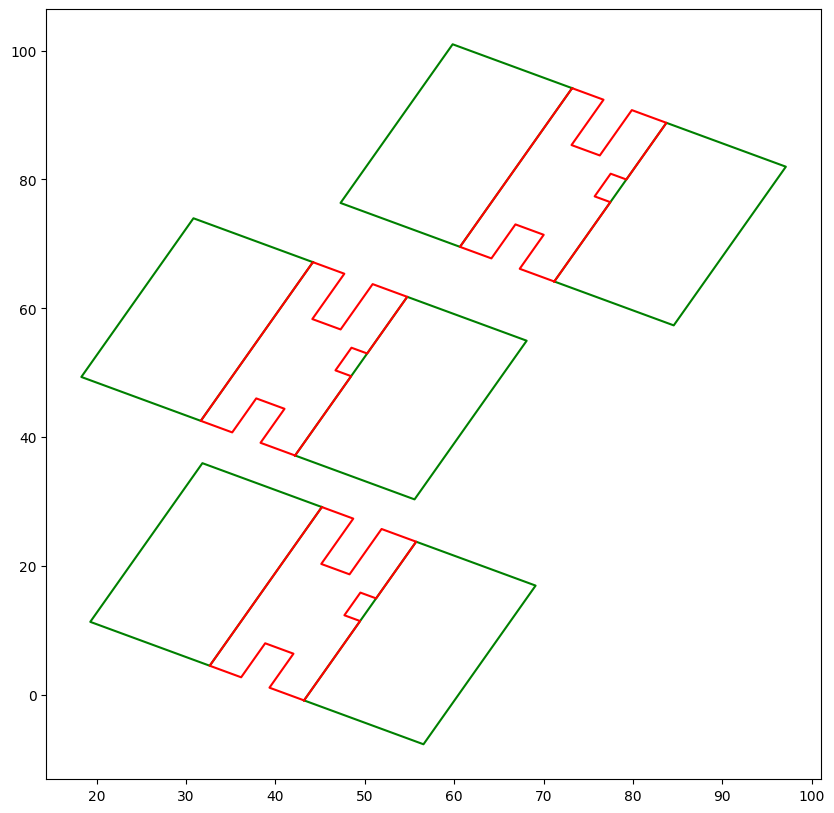

In [102]:
fig, ax = plt.subplots(figsize=(10, 10))
for p in env.building_list:
    bounds = p.minimum_rotated_rectangle.exterior.xy
    # get longest side of the building boundary
    x1, y1 = bounds[0][0], bounds[1][0]
    x2, y2 = bounds[0][1], bounds[1][1]
    x3, y3 = bounds[0][2], bounds[1][2]
    x4, y4 = bounds[0][3], bounds[1][3]
    w1 = math.sqrt((y2-y1)**2 + (x2-x1)**2)
    w2 = math.sqrt((y3-y2)**2 + (x3-x2)**2)

    # extend both sides of the longest sides of the building boundary by interblock distance scaled to grid size 
    interblock_distance = {"facing": 30, "non_facing": 10}
    grid_to_metre_ratio = 2
    interblock_dist = interblock_distance["facing"]/grid_to_metre_ratio
    if w1 > w2:
        projection_line = LineString([(x1,y1),(x2,y2)])
        projection_line2 = LineString([(x3,y3),(x4,y4)])
    else:
        projection_line = LineString([(x2,y2),(x3,y3)])
        projection_line2 = LineString([(x4,y4),(x1,y1)])
    buffer = projection_line.buffer(distance=-interblock_dist, cap_style="square", single_sided=True)
    buffer2 = projection_line2.buffer(distance=-interblock_dist, cap_style="square", single_sided=True)
    _ = ax.plot(buffer.exterior.xy[0], buffer.exterior.xy[1], color='green')
    _ = ax.plot(buffer2.exterior.xy[0], buffer2.exterior.xy[1], color='green')
    _ = ax.plot(p.exterior.xy[0], p.exterior.xy[1], color='red')

In [58]:
model = PPO('MlpPolicy', env, verbose=1, ent_coef=0.1, learning_rate= 0.0001, tensorboard_log="./re2/")
# Adjusting temperature parameter in the softmax policy
# model = PPO("MlpPolicy", env,ent_coef=0.05, policy_kwargs={"log_std_init": -2, "ortho_init": False}, verbose=1,tensorboard_log="./re2/")
# model = SAC("MlpPolicy", env, verbose=1,tensorboard_log="./re2/")
# model = RecurrentPPO('MlpLstmPolicy', env, verbose=1,ent_coef=0.05, tensorboard_log="./re2/")
# n_actions = env.action_space.shape[-1]
# action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

# model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)

# policy_kwargs = dict(net_arch=dict(pi=[256,256], vf=[256,256]))
# model = PPO('MlpPolicy', env, verbose=1,policy_kwargs =policy_kwargs , tensorboard_log="./ppo_tensorboard/")
model.learn(total_timesteps=10000,log_interval=4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./re2/PPO_57


KeyboardInterrupt: 

In [311]:
import os
import numpy as np
from stable_baselines3.common.callbacks import BaseCallback

class SaveBestModelCallback(BaseCallback):
    def __init__(self, save_path, verbose=1):
        super(SaveBestModelCallback, self).__init__(verbose)
        self.save_path = save_path
        self.best_mean_reward = -float('inf')

    def _on_step(self) -> bool:
        # Retrieve the current mean reward from the episode information buffer
        ep_infos = self.model.ep_info_buffer
        if len(ep_infos) > 0:
            mean_reward = np.mean([ep_info['r'] for ep_info in ep_infos])

            # Check if the current mean reward is higher than the best so far
            if mean_reward > self.best_mean_reward:
                self.best_mean_reward = mean_reward

                # Save the model
                self.model.save(self.save_path)
                print(f"Saving new best model with mean reward {mean_reward}")

        return True

# Example usage:
from stable_baselines3 import PPO

# Define your environment and create a callback instance

save_path = 'best_model_3_w_interblock_distance_ppo95.zip'

# Create the callback
callback = SaveBestModelCallback(save_path)
env = SpaDesPlacement(sites_info, building_list[0])
# Create and train the PPO agent with the callback
model = PPO('MlpPolicy', env, ent_coef=0.1, tensorboard_log="./re2/")
model.learn(total_timesteps=10000000, callback=callback)


Saving new best model with mean reward -10.0
Saving new best model with mean reward -9.96638566
Saving new best model with mean reward -9.94259987
Saving new best model with mean reward -9.942599869999999
Saving new best model with mean reward -9.85202181
Saving new best model with mean reward -9.74060455
Saving new best model with mean reward -9.69548433
Saving new best model with mean reward -9.39913261
Saving new best model with mean reward -9.37995957
site coverage covered
Saving new best model with mean reward -9.35305234
Saving new best model with mean reward -9.15118248
Saving new best model with mean reward -9.12915026
Saving new best model with mean reward -9.0119112
Saving new best model with mean reward -8.735533519999999
site coverage covered
Saving new best model with mean reward -8.73403804
site coverage covered
Saving new best model with mean reward -8.65595417
site coverage covered
site coverage covered
site coverage covered
site coverage covered
site coverage covered
s

[[-1.         -0.          0.         -1.        ]
 [21.11418044 27.7928807   3.         -1.        ]
 [33.82351717 37.24352663  3.          0.66015673]
 [20.7345294  -0.1         3.          0.29429445]]
mean reward: -292.0 std: 44.67661580737735
100


/Users/jefflai/SpaDS/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jefflai/SpaDS/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jefflai/SpaDS/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jefflai/SpaDS/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: Matplotli

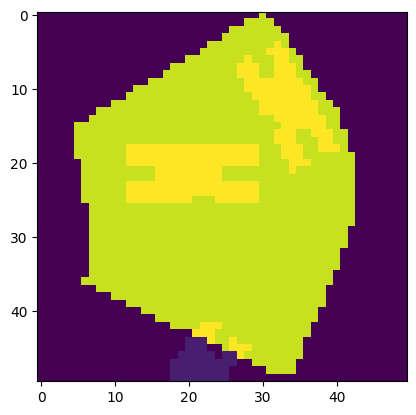

In [76]:

env = SpaDesPlacement(sites_info, building_list[0])
rewards = []
best_obs = ''
best_reward = -float('inf')
best_boxes = []
episode =0
for i in range(1000):
# while best_reward < 1800 and episode <5000:
    obs,info = env.reset(seed =1 , name = 'clavon')
    # obs,info = env.reset(seed =1 , name = 'clementi peaks')
    episode_reward = 0
    episode +=1
    while True:
        
    # for _ in range(1000):
        # action, _ = model.predict(obs,deterministic=True)
        action, _ = model.predict(obs)
        # print(action)
        obs, reward, done, _,_ = env.step(action)
        # print(reward,'r')
    
        episode_reward +=reward
        #reshpare a list to np.array (10x10)
    
        if done :
            if episode_reward > best_reward:
                best_reward = episode_reward
                best_obs = obs
                best_boxes = env.boxes
                

            # print(np.array(obs[:100]).reshape(10,10))
            # print('boxes placed:\n ',env.boxes)
            # obs = env.reset()
            # print('done')
            break
    rewards.append(episode_reward)
obs_1 = np.reshape(best_obs, (50,50))
plt.imshow(obs_1)
print(best_boxes)

# env.render(best_boxes)
print("mean reward:", np.mean(rewards), "std:", np.std(rewards))
print(best_reward)




In [1303]:
from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100, deterministic=False)
print(mean_reward)


259.9383505630493


/Users/jefflai/SpaDS/env/lib/python3.11/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


In [ ]:
best_boxes

In [173]:
print(env.site_coverage)
print(env.total_footprint_pixel)
print(env.site_boundary.area)
print(env.total_footprint_pixel/env.site_pixel)

0.4
176
1273.8178913327463
0.16682464454976303


In [77]:
import torch
import time
date = time.strftime("%Y-%m-%d")
save_path = f'best_model_so_far{date}.pth'

# Save the entire model
model.save(save_path)

In [29]:
import os
# load_path = "../RL/ppo_model_v3_23-11-22.pth"
load_path = 'best_model_3_w_interblock_distance_ppo96.zip'

# Load the model

if os.path.exists(load_path):
    model = PPO.load(load_path)
    # Continue with your code
else:
    print(f"The file {load_path} does not exist.")